In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('titanic_toy.csv')

In [4]:
data

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


**Data Preprocessing**

In [5]:
data.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
data.tail()

,Age,Fare,Family,Survived
886,27.0,13.00,0,0
887,19.0,30.00,0,1
888,NaN,23.45,3,0
889,26.0,NaN,0,1
890,32.0,7.75,0,0


In [7]:
data.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


In [8]:
duplicates =data.duplicated()

In [ ]:
data.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [9]:
duplicates

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,True
887,False
888,True
889,False


In [10]:
duplicates.sum()

np.int64(129)

In [11]:
data = data.drop_duplicates()
data


,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
883,28.0,10.5000,0,0
885,39.0,29.1250,5,0
887,19.0,30.0000,0,1
889,26.0,NaN,0,1


In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
# prompt: remove the nan value rows from each variable

data = data.dropna()
data


,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
882,22.0,10.5167,0,0
883,28.0,10.5000,0,0
885,39.0,29.1250,5,0
887,19.0,30.0000,0,1


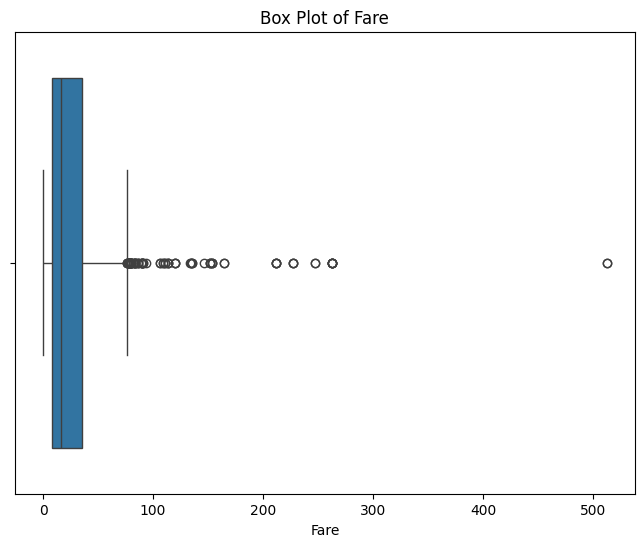

In [14]:
# prompt: generate box plot on fare

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded as in the previous code.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fare', data=data)
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()


**Interpretation**
Most faresare between ~10 and ~80.
The median fare is around 25-30.
Fares above 100-120 are considered outliers.
Extreme outliers exist above 500, showing a highly skewed distribution.

In [15]:
# Check for outliers

In [18]:
# prompt: Check for the outliers on fare column of data

# Calculate quartiles
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Fare'] < lower_bound) | (data['Fare'] > upper_bound)]

# Print or further process the outliers
print("Outliers in 'Fare' column:")
outliers


Outliers in 'Fare' column:


,Age,Fare,Family,Survived
27,19.0,263.0000,5,0
34,28.0,82.1708,1,0
52,49.0,76.7292,1,1
61,38.0,80.0000,0,1
62,45.0,83.4750,1,0
...,...,...,...,...
820,52.0,93.5000,2,1
829,62.0,80.0000,0,1
835,39.0,83.1583,2,1
856,45.0,164.8667,2,1


**Interpretation**
Here we are checking the outliers for the fare column where we found out that there are 81 outliers.

In [19]:
# prompt: perform scaling on age and fare column]

from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' DataFrame is already loaded and outliers are handled.

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the 'Age' and 'Fare' columns
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Display the scaled data
print(data.head())


        Age      Fare  Family  Survived
0  0.271174  0.014151       1         0
1  0.472229  0.139136       1         1
2  0.321438  0.015469       0         1
3  0.434531  0.103644       1         1
4  0.434531  0.015713       0         0


<ipython-input-19-54746fd8ea54>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])


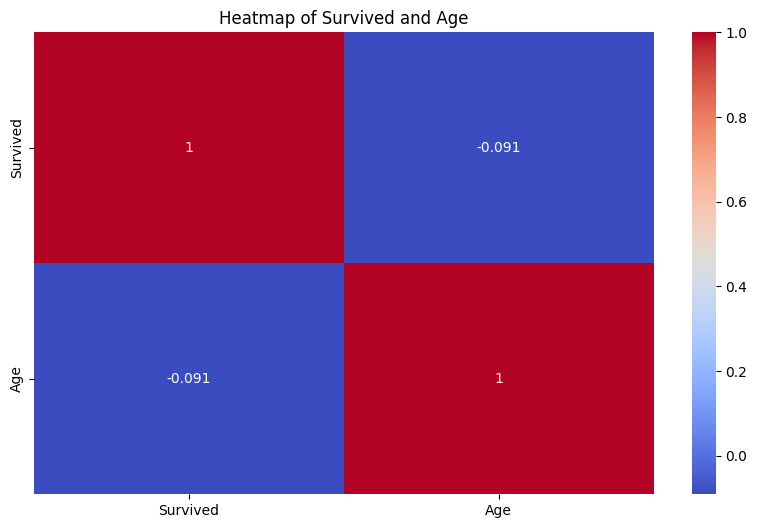

In [20]:
# prompt: generate heatmap for the variables survived and age for data

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(data[['Survived','Age']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Survived and Age')
plt.show()


**Interpretation**
Through heatmaps we are trying to see the correlation between the two variables survived and Age.
The value at the intersection of "Survived" and "Age" is -0.091, indicating a weak negative correlation.



In [25]:
import statsmodels.api as sm

# Define independent variables
X = data[['Age', 'Fare', 'Family']]

# Define dependent variable
y = data['Survived']

# Add constant to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     21.23
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           4.16e-13
Time:                        20:44:01   Log-Likelihood:                -417.54
No. Observations:                 631   AIC:                             843.1
Df Residuals:                     627   BIC:                             860.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4775      0.049      9.791      0.0

In [28]:
# prompt: remove the insignificant varaible family
import statsmodels.api as sm

# Select only significant independent variables
X = data[['Age', 'Fare']]
y = data['Survived']

# Drop missing values if any
X = X.dropna()
y = y.loc[X.index]  # ensure y aligns with X

# Add constant to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the updated model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     32.89
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           2.37e-14
Time:                        20:45:39   Log-Likelihood:                -444.20
No. Observations:                 675   AIC:                             894.4
Df Residuals:                     672   BIC:                             907.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4167      0.042     10.021      0.0

In [29]:
# Get the model coefficients
intercept = model.params['const']
coefficients = model.params.drop('const')

# Format the equation
equation = f"Survived = {intercept:.4f}"
for var, coef in coefficients.items():
    equation += f" + ({coef:.4f} * {var})"

# Display the equation
print("Regression Equation:")
print(equation)



Regression Equation:
Survived = 0.4167 + (-0.0037 * Age) + (0.0026 * Fare)


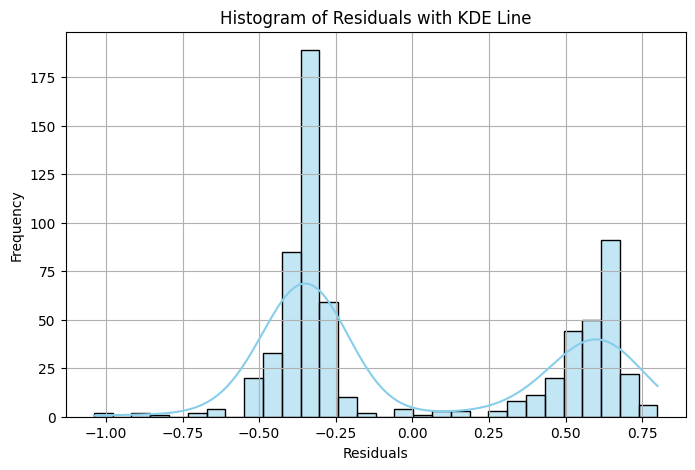

In [30]:
# prompt: check whether residuals are normally distributed using histogram with line

residuals = model.resid

# Plot histogram with KDE line
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals with KDE Line')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

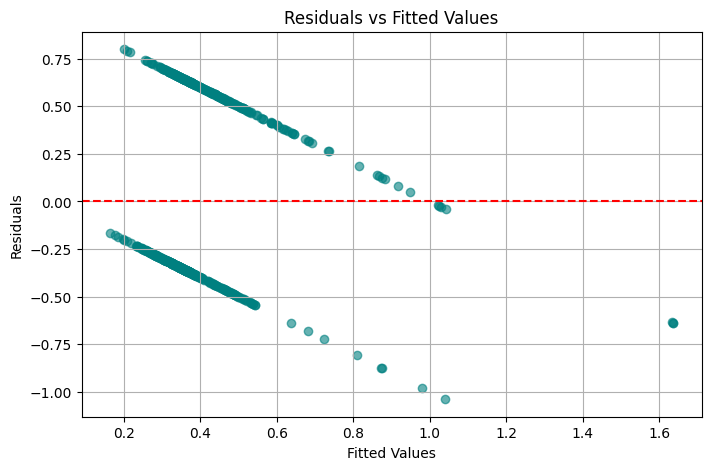

In [31]:
import matplotlib.pyplot as plt

# Get fitted values and residuals
fitted_vals = model.fittedvalues
residuals = model.resid

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(fitted_vals, residuals, color='teal', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()



In [32]:
from statsmodels.stats.diagnostic import het_white

# Get residuals and design matrix (X values with constant)
residuals = model.resid
exog = model.model.exog  # design matrix used in model (already includes constant)

# Perform White test
white_test = het_white(residuals, exog)

# Unpack results
labels = ['Test Statistic', 'p-value', 'F-Statistic', 'F-Test p-value']
results = dict(zip(labels, white_test))

# Display results
print("White Test Results:")
for label, value in results.items():
    print(f"{label}: {value:.4f}")



White Test Results:
Test Statistic: 24.2905
p-value: 0.0002
F-Statistic: 4.9947
F-Test p-value: 0.0002
